In [19]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output

In [20]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/'
replicate='lc_gsms_4_5_16-51-0-507/'
filename='norepmorphdesc.csv'
filepath=repository+replicate+filename
print('Filepath: ' + filepath)

Filepath: /home/ebb505/ARE_Project/are-logs/lc_gsms_4_5_16-51-0-507/norepmorphdesc.csv


In [21]:
# Get all directories
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(repository+replicate):
    for file in f:
        if(file[0] == 'g' and file[1] == 'r'):
            files.append(os.path.join(r, file))
print("Files: ", len(files))

Files:  1275


In [22]:
# Get information from files
graphMats = []
for f in files:
    my_list = []
    with open(f , 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    graphMats.append(my_list)

In [23]:
population = len(graphMats)

In [24]:
print(len(graphMats))
print(len(graphMats[0]))
print(len(graphMats[0][0]))
print(graphMats[0][0][25])

1275
25
625
1


In [25]:
# Process data
graphData = []
for ind in range(population):
    dat = np.array([[float(y) for y in x] for x in graphMats[ind]]) # Convert to array
    graphData.append(dat)
print("Done!")

Done!


In [26]:
# Process data
indDistanceList = []
allDistance = []
for currentInd in range(population):
    tempList = []
    print("Progress: ", currentInd/population)
    for ind in range(population):
        differentVoxels = 0
        for i in range(len(graphMats[0])):
            for j in range(len(graphMats[0][0])):
                if(graphData[currentInd][i][j] != graphData[ind][i][j]):
                    differentVoxels = differentVoxels + 1
        if(currentInd != ind): # Do not add the ind itself
            tempList.append(differentVoxels)
    indDistanceList.append(np.mean(tempList))
clear_output(wait=True)
print("Done!")

Done!


In [9]:
print(len(indDistanceList))
#print(len(indDistanceList[0]))
print(indDistanceList)

650
[5105.28967642527, 5169.755007704161, 5155.99845916795, 5155.5608628659475, 5169.365177195686, 5145.1278890600925, 5138.963020030817, 5166.745762711865, 5162.038520801233, 5127.482280431433, 5095.130970724191, 5143.71032357473, 5145.613251155624, 5103.751926040061, 5156.323574730354, 5155.99845916795, 5176.275808936826, 5175.771956856703, 5148.338983050848, 5174.137134052388, 5116.543913713405, 5143.71032357473, 5184.211093990755, 5166.8335901386745, 5173.835130970724, 5127.483821263482, 5160.479198767334, 5191.677966101695, 5187.664098613252, 5171.33281972265, 5165.479198767334, 5182.80123266564, 5099.204930662558, 5130.9892141756545, 5119.983050847458, 5167.902927580893, 5153.864406779661, 5103.2573189522345, 5127.687211093991, 5160.68875192604, 5159.228043143297, 5099.204930662558, 5178.722650231125, 5122.345146379044, 5170.88906009245, 5130.118644067797, 5141.719568567026, 5156.812018489984, 5165.317411402157, 5147.013867488444, 5174.761171032357, 5178.238828967643, 5168.077041

ValueError: x and y must have same first dimension, but have shapes (25,) and (1,)

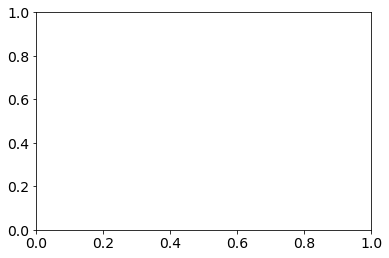

In [29]:
# Plot stuff
xValues = list(range(0, len(indDistanceList), 1))
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

plt.plot(xValues, indDistanceList, '-', color='blue',  linewidth=2.5)

plt.xlabel('Evaluations')
plt.ylabel('Sparseness')

axes = plt.gca()

#plt.legend(['No collisions','Good orientations','Gripper access' ])
plt.title("Sparseness progress")
#plt.savefig(repository+replicate+'Sparseness.png',dpi=200)